# Forex analysis - ARIMA

Importing libraries for statistical analysis and plotting

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#  1. Getting data

In [2]:
eurusd = pd.read_csv("data/EURUSD_daily.csv", index_col='Date')

In [3]:
eurusd.index = pd.to_datetime(eurusd.index)

In [4]:
eurusd = eurusd['2007-01-01':'2008-05-01']

In [5]:
eurusd.head()

,EUR/USD Close
Date,
2007-01-01,1.3146
2007-01-02,1.3287
2007-01-03,1.3163
2007-01-04,1.3085
2007-01-05,1.3009


In [6]:
eurusd.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
EUR/USD Close,349.0,1.408096,0.08286,1.289,1.3434,1.3797,1.4668,1.5997


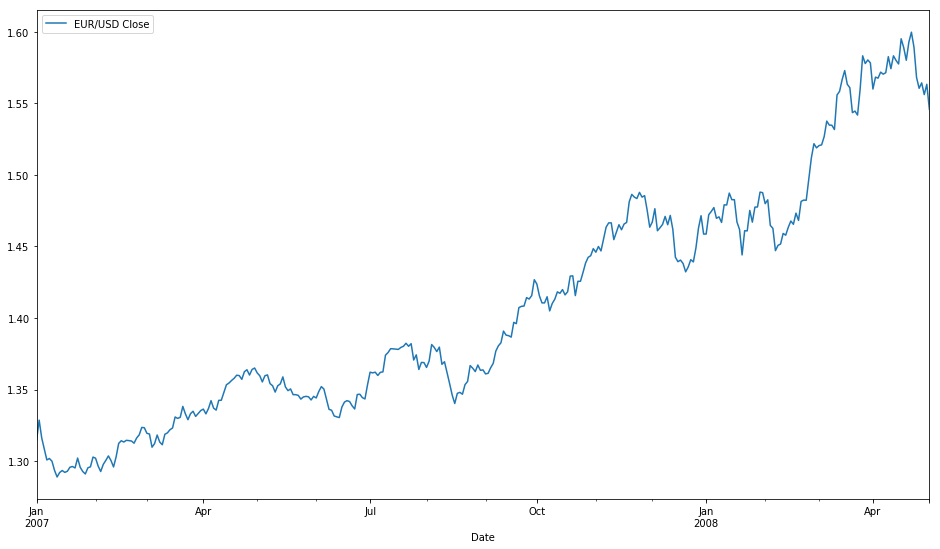

In [7]:
eurusd.plot(figsize=(16,9))

In [8]:
timeseries = eurusd['EUR/USD Close']

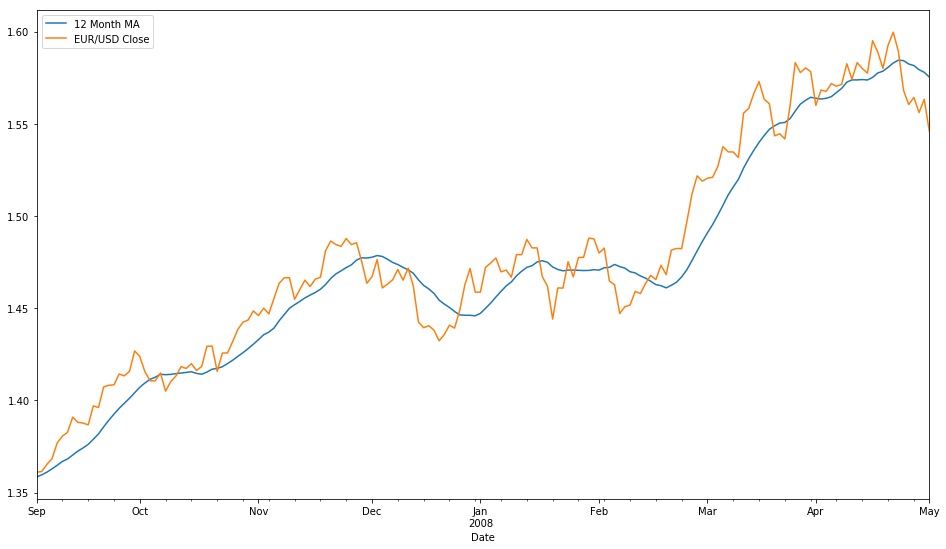

In [9]:
timeseries.rolling(12).mean()['2007-09-01':'2008-09-01'].plot(label='12 Month MA', figsize = (16,9))
#timeseries.rolling(12).std()['2007-09-01':'2008-09-01'].plot(label='12 Month rolling STD')
timeseries['2007-09-01':'2008-09-01'].plot()
plt.legend(loc='best')

# Testing for Stationarity

In [10]:
from statsmodels.tsa.stattools import adfuller

/home/dawe/.local/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [11]:
result = adfuller(timeseries)

In [12]:
def adf_test(time_series):
    """
    Pass in a time series, returns ADF report
    """
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:')
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']

    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("Data is stationary")
    else:
        print("Data is non-stationary ")

In [13]:
adf_test(timeseries)

Augmented Dickey-Fuller Test:
ADF Test Statistic : -0.256525508468
p-value : 0.931439917962
#Lags Used : 0
Number of Observations Used : 348
Data is non-stationary 


In [14]:
eurusd['Fx rate first difference'] = eurusd['EUR/USD Close'] - eurusd['EUR/USD Close'].shift(1)

In [15]:
adf_test(eurusd['Fx rate first difference'].dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -18.7277242622
p-value : 2.03142004844e-30
#Lags Used : 0
Number of Observations Used : 347
Data is stationary


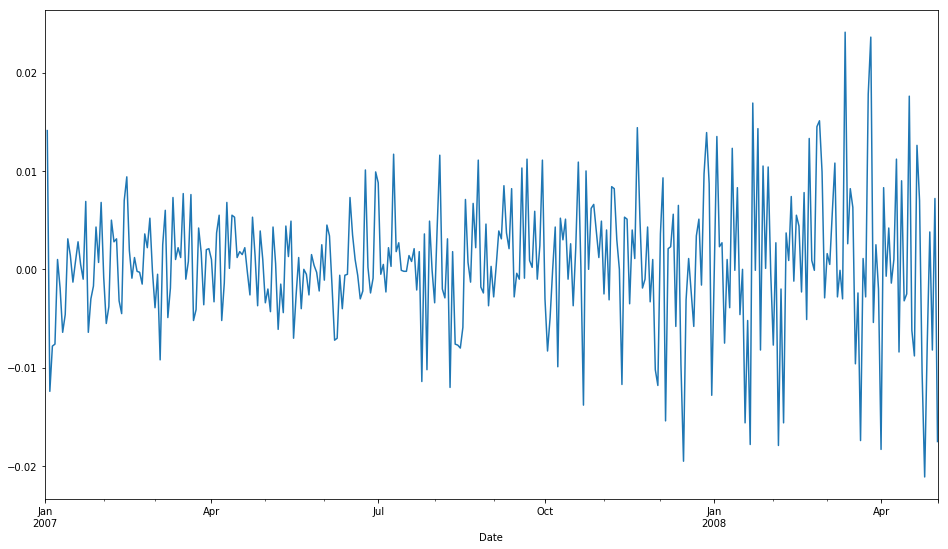

In [16]:
eurusd['Fx rate first difference'].plot(figsize = (16,9))

# Autocorrelation

In [17]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

(-1, 150)

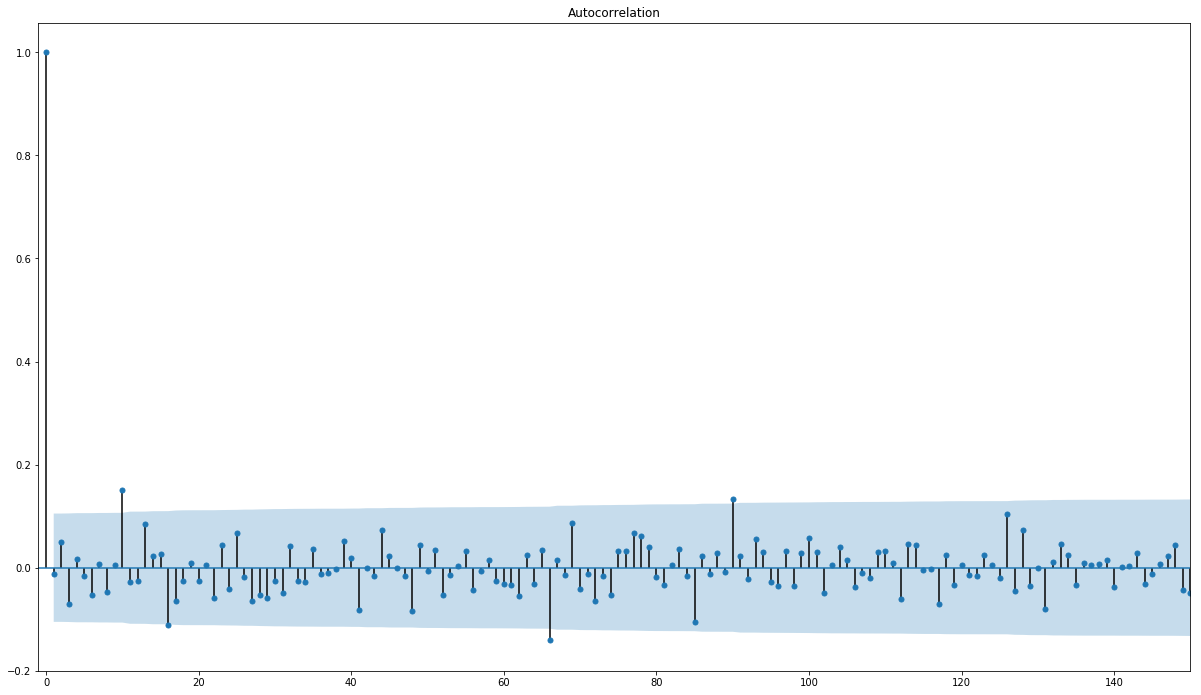

In [28]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_axes([0,0,1,1])
first_diff_acf = plot_acf(eurusd['Fx rate first difference'].dropna(), ax=ax)
ax.set_xlim(-1,150)


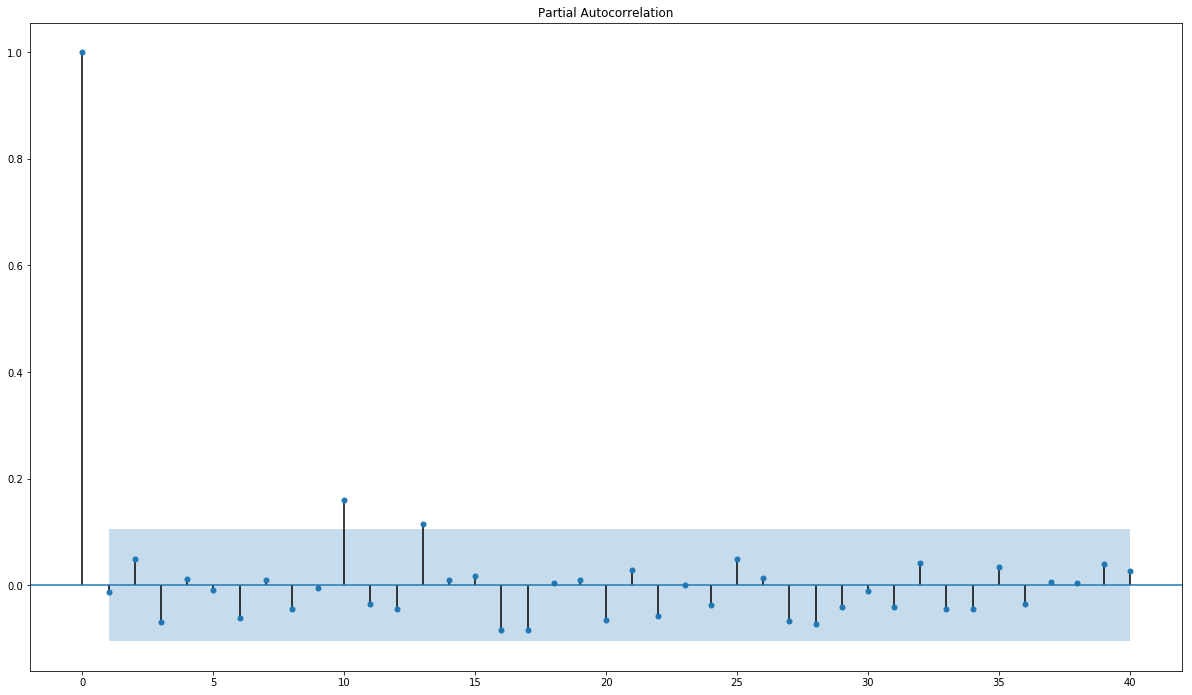

In [19]:
fig = plt.figure(figsize=(16,9))
ax = fig.add_axes([0,0,1,1])
first_diff_pacf = plot_pacf(eurusd['Fx rate first difference'].dropna(), lags=40, ax=ax)


# ARIMA model

In [20]:
from statsmodels.tsa.arima_model import ARIMA

In [21]:
model = ARIMA(timeseries,order=(5,1,0))

In [22]:
model_fit = model.fit()

In [23]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:        D.EUR/USD Close   No. Observations:                  348
Model:                 ARIMA(5, 1, 0)   Log Likelihood                1250.463
Method:                       css-mle   S.D. of innovations              0.007
Date:                Mon, 16 Oct 2017   AIC                          -2486.926
Time:                        19:11:31   BIC                          -2459.961
Sample:                    01-02-2007   HQIC                         -2476.191
                         - 05-01-2008                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.0007      0.000      1.923      0.055   -1.27e-05       0.001
ar.L1.D.EUR/USD Close    -0.0091      0.054     -0.168      0.867      -0.116       0.097
ar.L2.D.

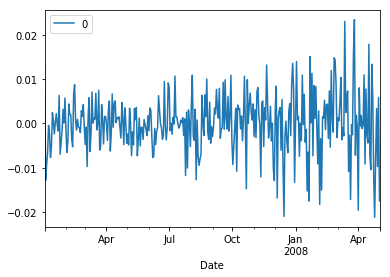

In [24]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()

In [25]:
residuals.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,348.0,-0.000001,0.006666,-0.021268,-0.003472,0.000023,0.0035,0.023518


In [26]:
#fig = plt.figure(figsize=(16,9))
#ax = fig.add_axes([0,0,1,1])
#irst_diff_acf = plot_acf(eurusd['Fx rate first difference'].dropna(), ax=ax)
#ax.set_xlim(-1,150)
#x.set_ylim(-.1,.1)

In [32]:
eurusd['forecast'] = model_fit.predict(start = '2008-04-04', end = '2008-05-04', dynamic=True, typ='levels')


(1.5, 1.65)

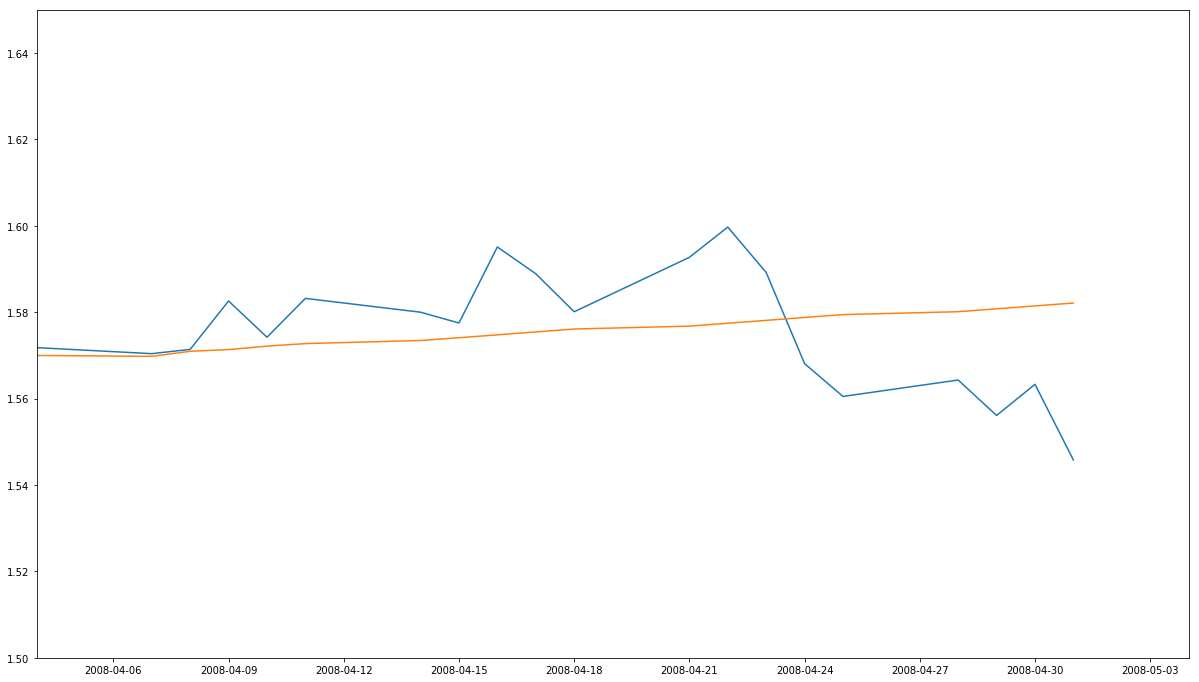

In [37]:
figFor = plt.figure(figsize = (16,9))
ax = figFor.add_axes([0,0,1,1])
ax.plot(eurusd['EUR/USD Close'])
ax.plot(eurusd['forecast'])
ax.set_xlim('2008-04-04', '2008-05-04')
ax.set_ylim(1.5,1.65)

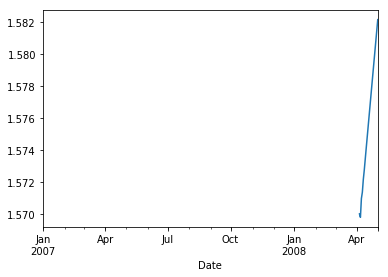

In [38]:
eurusd['forecast'].plot()